merge and split


In [2]:
import tensorflow as tf
import numpy as np

In [ ]:
a=tf.ones([2,3,4])
b=tf.ones([2,3,4])

In [3]:
c=tf.concat([a,b],axis=0)
c=tf.stack([a,b],axis=0)
print(c.shape)
c_unstack=tf.unstack(c,axis=3)
print(len(c_unstack))
c_split=tf.split(c,axis=3,num_or_size_splits=[1,1,2])
print(c_split)

(2, 2, 3, 4)
4
[<tf.Tensor: id=15, shape=(2, 2, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]]], dtype=float32)>, <tf.Tensor: id=16, shape=(2, 2, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]]], dtype=float32)>, <tf.Tensor: id=17, shape=(2, 2, 3, 2), dtype=float32, numpy=
array([[[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]], dtype=float32)>]


In [4]:
train_data=tf.constant([[0.7,0.2,0.1],[0.1,0.1,0.8]],dtype=tf.float32)
true_data=tf.constant([0,1],dtype=tf.int32)
label=tf.cast(tf.argmax(train_data,axis=1),dtype=tf.int32)
accruracy=tf.cast(tf.equal(label,true_data),dtype=tf.int32)
accruracy=tf.reduce_sum(accruracy)/2
print(accruracy)
c=tf.constant([1,1,2,3,1])
print(tf.unique(c))

tf.Tensor(0.5, shape=(), dtype=float64)
Unique(y=<tf.Tensor: id=32, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>, idx=<tf.Tensor: id=33, shape=(5,), dtype=int32, numpy=array([0, 0, 1, 2, 0])>)


In [5]:
def accuracy(out_put,target,topk=(1,)):
    maxk=max(topk)
    batch_size=target.shape[0]
    pre=tf.math.top_k(out_put,maxk).indices
    pre=tf.transpose(pre,perm=[1,0])
    target=tf.broadcast_to(target,pre.shape)
    correct=tf.equal(pre,target)

    res=[]
    for k in topk:
        correct_k=tf.cast(tf.reshape(correct[:k],[-1]),dtype=tf.float32)
        correct_k=tf.reduce_sum(correct_k)
        acc=float(correct_k*(100/batch_size))
        res.append(acc)
    return res

out=tf.random.normal([10,6])
out=tf.math.softmax(out,axis=1)
label=tf.random.uniform([10],maxval=6,dtype=tf.int32,name='label')
print("prob:",out)
pred=tf.argmax(out,axis=1)
acc=accruracy(out,label,(1,2,3,4,5,6))
print(acc)

prob: tf.Tensor(
[[0.02089704 0.48788154 0.09847528 0.15008931 0.08175372 0.16090317]
 [0.15530096 0.54295397 0.10459606 0.10212659 0.06432291 0.03069951]
 [0.04375085 0.11656653 0.7085769  0.04087676 0.07125717 0.01897186]
 [0.03316064 0.21843824 0.33921888 0.25541568 0.03535736 0.1184093 ]
 [0.0419951  0.38855508 0.02944962 0.16078113 0.10516834 0.27405074]
 [0.36071122 0.08212854 0.15907313 0.09643277 0.19430472 0.10734963]
 [0.13693334 0.3218144  0.07729013 0.12464286 0.19512421 0.1441951 ]
 [0.02974932 0.0404368  0.26085523 0.013595   0.5315087  0.12385499]
 [0.11039347 0.2360035  0.06632221 0.30757824 0.05893466 0.22076799]
 [0.05531292 0.4539122  0.02539081 0.07348789 0.00222803 0.38966808]], shape=(10, 6), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

填充和复制


In [1]:
aa=tf.pad(a,[[0,0],[1,1],[1,1]])
print(aa)
bb=tf.tile(b,[2,1,1])
print(bb.shape)

NameError: name 'tf' is not defined

张量限幅


In [ ]:
nums=tf.range(10,dtype=tf.int32)
print(tf.maximum(nums,3))

In [ ]:
c=tf.random.normal([3,3],dtype=tf.float32)
print(c)
mask=c>0
print(mask)
indices=tf.where(mask)
print(indices)
res=tf.gather_nd(c,indices=indices)
print(res)

tf.Tensor(
[[-1.8185948  -1.7507684  -0.9092974  -0.06782645  0.        ]
 [-1.7507684  -1.6829419  -0.84147096  0.          0.06782645]
 [-0.9092974  -0.84147096  0.          0.84147096  0.9092974 ]
 [-0.06782645  0.          0.84147096  1.6829419   1.7507684 ]
 [ 0.          0.06782645  0.9092974   1.7507684   1.8185948 ]], shape=(5, 5), dtype=float32)


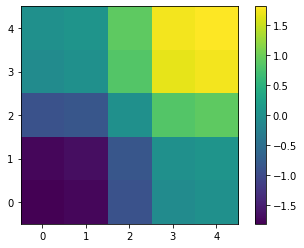

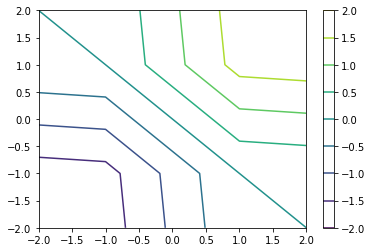

In [15]:
import matplotlib.pyplot as plt
def fun(x):
    z=tf.math.sin(x[...,0])+tf.math.sin(x[...,1])
    return z

x=tf.linspace(-2.,2,5)
y=tf.linspace(-2.,2,5)
pointx,pointy=tf.meshgrid(x,y)
points=tf.stack([pointx,pointy],axis=2)
z=fun(points)
print(z)
plt.figure('plot 2d func value')
plt.imshow(z,origin='lower',interpolation='none')
plt.colorbar()
plt.figure('plot 2d func,contour')
plt.contour(pointx,pointy,z)
plt.colorbar()
plt.show()